In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
stars = pd.read_csv("star_classification.csv")
stars

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237660e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543780e+18,GALAXY,0.634794,5812,56354,171
1,1.237660e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176010e+19,GALAXY,0.779136,10445,58158,427
2,1.237660e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237660e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030110e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891860e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237680e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.060000e+19,GALAXY,0.000000,9374,57749,438
99996,1.237680e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586350e+18,GALAXY,0.404895,7626,56934,866
99997,1.237670e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112010e+18,GALAXY,0.143366,2764,54535,74
99998,1.237660e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [3]:
stars.tail()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
99995,1.237680e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.060000e+19,GALAXY,0.000000,9374,57749,438
99996,1.237680e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586350e+18,GALAXY,0.404895,7626,56934,866
99997,1.237670e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112010e+18,GALAXY,0.143366,2764,54535,74
99998,1.237660e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470
99999,1.237660e+18,196.896053,49.464643,22.62171,21.79745,20.60115,20.00959,19.28075,3650,301,4,60,8.343150e+18,GALAXY,0.542944,7410,57104,851


In [4]:
stars.tail(100)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
99900,1.237680e+18,352.879980,27.433579,19.77479,19.29704,19.18981,19.16206,19.01953,8103,301,5,54,7.094480e+18,QSO,2.551272,6301,56543,682
99901,1.237660e+18,244.012521,33.050380,21.06252,19.25307,18.97302,19.05668,19.16426,3918,301,2,313,5.584530e+18,STAR,-0.000118,4960,55747,224
99902,1.237650e+18,167.521582,3.476030,17.78492,16.20104,15.32155,14.87348,14.53700,1992,301,6,118,6.541610e+17,GALAXY,0.040042,581,52356,46
99903,1.237660e+18,20.996732,0.662911,22.39716,22.14314,21.87024,21.91344,23.66613,4128,301,5,263,1.057800e+19,GALAXY,0.808890,9395,58113,590
99904,1.237660e+18,138.769656,31.020056,21.80558,20.47592,18.68070,18.04094,17.56351,3704,301,1,47,6.539360e+18,GALAXY,0.306127,5808,56325,492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237680e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.060000e+19,GALAXY,0.000000,9374,57749,438
99996,1.237680e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586350e+18,GALAXY,0.404895,7626,56934,866
99997,1.237670e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112010e+18,GALAXY,0.143366,2764,54535,74
99998,1.237660e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [5]:
df = stars.drop("obj_ID",axis = 1)

In [6]:
df = df.drop(["run_ID","rerun_ID","cam_col","fiber_ID","plate"],axis = 1)

In [7]:
print(df)

            alpha      delta         u         g         r         i  \
0      135.689107  32.494632  23.87882  22.27530  20.39501  19.16573   
1      144.826101  31.274185  24.77759  22.83188  22.58444  21.16812   
2      142.188790  35.582444  25.26307  22.66389  20.60976  19.34857   
3      338.741038  -0.402828  22.13682  23.77656  21.61162  20.50454   
4      345.282593  21.183866  19.43718  17.58028  16.49747  15.97711   
...           ...        ...       ...       ...       ...       ...   
99995   39.620709  -2.594074  22.16759  22.97586  21.90404  21.30548   
99996   29.493819  19.798874  22.69118  22.38628  20.45003  19.75759   
99997  224.587407  15.700707  21.16916  19.26997  18.20428  17.69034   
99998  212.268621  46.660365  25.35039  21.63757  19.91386  19.07254   
99999  196.896053  49.464643  22.62171  21.79745  20.60115  20.00959   

              z  field_ID   spec_obj_ID   class  redshift    MJD  
0      18.79371        79  6.543780e+18  GALAXY  0.634794  56354  
1

In [8]:
df = df.drop("class",axis  =1)

In [9]:
X = df

In [ ]:
import seaborn as sns

sns.pairplot(stars, hue = "class")

In [10]:
x = np.array(stars["alpha"]).reshape(-1,1)
y = np.array(stars["class"])

In [11]:
#logistic regression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state = 42)

In [14]:
log_reg = LogisticRegression(random_state = 42)

In [15]:
clf = log_reg.fit(x_train,y_train)

In [16]:
S = log_reg.predict(X)
print(S)

['GALAXY' 'GALAXY' 'GALAXY' ... 'GALAXY' 'GALAXY' 'GALAXY']


In [17]:
log_reg.predict_proba(X)

array([[0.53098739, 0.2721554 , 0.19685721],
       [0.68076154, 0.20480644, 0.11443202],
       [0.48812381, 0.28839655, 0.22347964],
       ...,
       [0.42525429, 0.30946176, 0.26528395],
       [0.56309473, 0.25906859, 0.17783668],
       [0.58523773, 0.24960258, 0.16515969]])

In [18]:
log_reg.predict_log_proba(X)

array([[-0.633017  , -1.30138207, -1.62527662],
       [-0.3845432 , -1.58568994, -2.16777434],
       [-0.7171862 , -1.24341883, -1.49843496],
       ...,
       [-0.85506796, -1.17292075, -1.32695452],
       [-0.57430741, -1.35066242, -1.72688967],
       [-0.53573714, -1.38788529, -1.80084245]])

In [19]:
clf.score(X,y)

0.59445

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
#RFR

In [24]:
forest = RandomForestClassifier(max_depth = 500, random_state = 42)

In [25]:
f0 = forest.fit(x_train,y_train)

In [26]:
f0.score(X,y)

0.9947

In [81]:
forest.predict_proba(x_test)

array([[1.  , 0.  , 0.  ],
       [0.04, 0.  , 0.96],
       [0.  , 0.  , 1.  ],
       ...,
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.57, 0.41, 0.02]])

In [68]:
pred2 = forest.predict(x_test)

In [33]:
#gaussian naive bayes classifier

In [34]:
from sklearn.naive_bayes import GaussianNB

In [35]:
bayes = GaussianNB()

In [36]:
bayes.fit(x_train,y_train)

GaussianNB()

In [64]:
bayes_pred = bayes.predict(x_test)

In [38]:
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,ConfusionMatrixDisplay

In [65]:
accuracy = accuracy_score(bayes_pred,y_test)
print(accuracy)

f1 = f1_score(bayes_pred,y_test, average = "weighted")
print(f1)

cm = confusion_matrix(y_test, bayes_pred)
matrix = ConfusionMatrixDisplay(confusion_matrix = cm)
print(cm)

0.60464
0.725905820105047
[[14560   335     0]
 [ 4213   556     0]
 [ 5124   212     0]]


In [60]:
from sklearn.model_selection import cross_val_score as cross
cross(bayes,x_train,y_train, cv = 5, scoring = "accuracy")

array([0.60013333, 0.60226667, 0.60326667, 0.60233333, 0.59666667])

In [61]:
cross(forest,x_train,y_train, cv = 3, scoring = "accuracy")

array([0.97736, 0.97968, 0.97852])

In [70]:
f1_score(pred2,y_test, average = "weighted")

0.9789710501723629

In [72]:
print(pred2)

['GALAXY' 'STAR' 'STAR' ... 'STAR' 'GALAXY' 'GALAXY']


<AxesSubplot: ylabel='Count'>

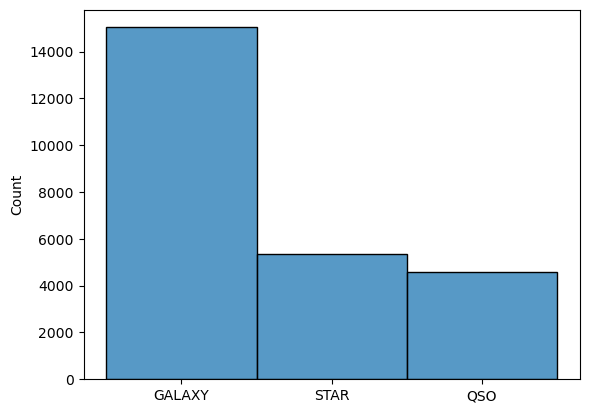

In [74]:
sns.histplot(pred2)

<AxesSubplot: ylabel='Count'>

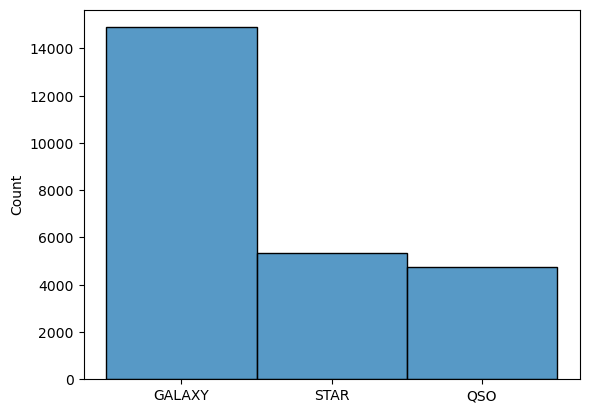

In [76]:
sns.histplot(y_test)